In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from env.environment import StrategicLendingEnv

In [2]:
import seaborn as sns

sns.set_theme(style="white", context="paper", font_scale=1.5)

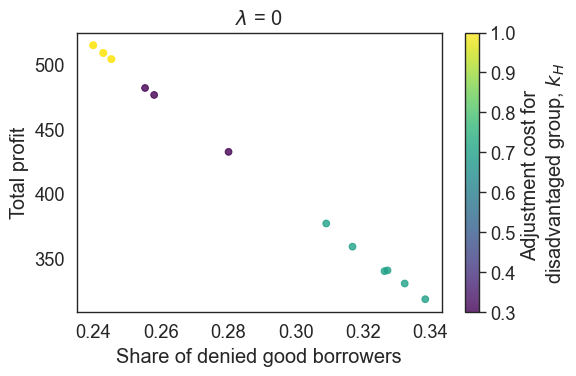

In [8]:
# Load meta-sweep results at λ = 0
df = pd.read_csv("util/metaruns.csv")

plt.figure(figsize=(6, 4))
sc = plt.scatter(df["H_frac"], df["Pi"], c=df["k_H"], cmap="viridis", alpha=0.8)

plt.xlabel("Share of denied good borrowers")
plt.ylabel(r"Total profit")
plt.title(r"$\lambda$ = 0")

cbar = plt.colorbar(sc)
cbar.set_label("Adjustment cost for \ndisadvantaged group,"+r" $k_H$")

plt.tight_layout()
plt.savefig("fig/meta_profit_vs_harm.png", dpi=300)
plt.show()

In [5]:
params = dict(
    N=10_000,
    p_L=0.30,
    theta=0.0,
    b=1.0,
    h=0.10,
    k_L=0.1,
    k_H=0.30,
    pi_G=0.2,
    pi_B=-0.60,
    z_mean=0.0,
    z_std=1.0,
    seed=0,
)

regime_name = r"$p_L=0.30, b=1.0, h=0.10, k_H=0.30, \pi_B=-0.60$"

# λ and t grids (zoom λ to where change happens)
lambda_grid = np.linspace(0.0, 0.04, 41)
t_grid = np.linspace(-1.5, 4.0, 281)

env = StrategicLendingEnv(**params)

In [6]:
rows = []

for lam in lambda_grid:
    best_obj = -np.inf
    best_t = None
    best_stats = None

    for t in t_grid:
        obj, stats = env.evaluate_threshold(t, lam)
        if obj > best_obj:
            best_obj = obj
            best_t = t
            best_stats = stats

    rows.append(
        {
            "lambda": lam,
            "t_star": best_t,
            "Pi": best_stats["Pi"],
            "H": best_stats["H"],
            "H_frac": best_stats["H"] / env.N,
        }
    )

df = pd.DataFrame(rows)

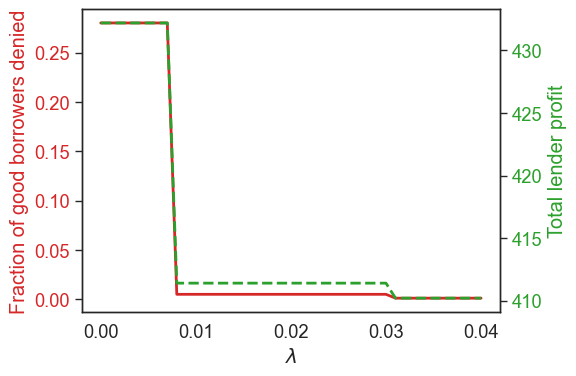

 lambda   t_star    Pi    H  H_frac
  0.000 3.155357 432.2 2801  0.2801
  0.001 3.155357 432.2 2801  0.2801
  0.002 3.155357 432.2 2801  0.2801
  0.003 3.155357 432.2 2801  0.2801
  0.004 3.155357 432.2 2801  0.2801
  0.005 3.155357 432.2 2801  0.2801
  0.006 3.155357 432.2 2801  0.2801
  0.007 3.155357 432.2 2801  0.2801
  0.008 1.937500 411.4   49  0.0049
  0.009 1.937500 411.4   49  0.0049
  0.010 1.937500 411.4   49  0.0049
  0.011 1.937500 411.4   49  0.0049
  0.012 1.937500 411.4   49  0.0049
  0.013 1.937500 411.4   49  0.0049
  0.014 1.937500 411.4   49  0.0049
  0.015 1.937500 411.4   49  0.0049
  0.016 1.937500 411.4   49  0.0049
  0.017 1.937500 411.4   49  0.0049
  0.018 1.937500 411.4   49  0.0049
  0.019 1.937500 411.4   49  0.0049
  0.020 1.937500 411.4   49  0.0049
  0.021 1.937500 411.4   49  0.0049
  0.022 1.937500 411.4   49  0.0049
  0.023 1.937500 411.4   49  0.0049
  0.024 1.937500 411.4   49  0.0049
  0.025 1.937500 411.4   49  0.0049
  0.026 1.937500 411.4   49 

In [7]:
fig, ax1 = plt.subplots(figsize=(6, 4))

# Left axis: harm fraction
ax1.plot(df["lambda"], df["H_frac"], color="tab:red", linewidth=2, label="Harm fraction", linestyle="-")
ax1.set_xlabel(r"$\lambda$")
ax1.set_ylabel("Fraction of good borrowers denied", color="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:red")

# Right axis: profit
ax2 = ax1.twinx()
ax2.plot(df["lambda"], df["Pi"], color="tab:green", label="Profit", linewidth=2, linestyle="--")
ax2.set_ylabel(r"Total lender profit", color="tab:green")
ax2.tick_params(axis="y", labelcolor="tab:green")

# plt.title(f"Harm and profit vs penalty strength\n{regime_name}")
fig.tight_layout()
plt.savefig("fig/lambda_vs_harm_and_profit_regime6.png", dpi=300)
plt.show()

# Optional: print table for sanity-check
print(df.to_string(index=False))